In [1]:
import diode_loader as dloader

2022-10-22 20:44:48.083045: I tensorflow/stream_executor/platform/default/dso_loader.cc:49] Successfully opened dynamic library libcudart.so.10.1


In [2]:
data = dloader.generate_dataframe("./splits/diode_train.csv")
data

images  \
0      train/outdoor/scene_00013/scan_00124/00013_001...   
1      train/outdoor/scene_00018/scan_00182/00018_001...   
2      train/indoors/scene_00006/scan_00056/00006_000...   
3      train/indoors/scene_00001/scan_00010/00001_000...   
4      train/indoors/scene_00006/scan_00054/00006_000...   
...                                                  ...   
25453  train/outdoor/scene_00010/scan_00096/00010_000...   
25454  train/indoors/scene_00005/scan_00039/00005_000...   
25455  train/outdoor/scene_00017/scan_00172/00017_001...   
25456  train/outdoor/scene_00012/scan_00111/00012_001...   
25457  train/indoors/scene_00002/scan_00023/00002_000...   

                                                   depth  \
0      train/outdoor/scene_00013/scan_00124/00013_001...   
1      train/outdoor/scene_00018/scan_00182/00018_001...   
2      train/indoors/scene_00006/scan_00056/00006_000...   
3      train/indoors/scene_00001/scan_00010/00001_000...   
4      train/indoors/scene_00006/scan_00054/00006_000...   
...                                                  ...   
25453  train/outdoor/scene_00010/scan_00096/00010_000...   
25454  train/indoors/scene_00005/scan_00039/00005_000...   
25455  train/outdoor/scene_00017/scan_00172/00017_001...   
25456  train/outdoor/scene_00012/scan_00111/00012_001...   
25457  train/indoors/scene_00002/scan_00023/00002_000...   

                                              depth_mask  
0      train/outdoor/scene_00013/scan_00124/00013_001...  
1      train/outdoor/scene_00018/scan_00182/00018_001...  
2      train/indoors/scene_00006/scan_00056/00006_000...  
3      train/indoors/scene_00001/scan_00010/00001_000...  
4      train/indoors/scene_00006/scan_00054/00006_000...  
...                                                  ...  
25453  train/outdoor/scene_00010/scan_00096/00010_000...  
25454  train/indoors/scene_00005/scan_00039/00005_000...  
25455  train/outdoor/scene_00017/scan_00172/00017_001...  
25456  train/outdoor/scene_00012/scan_00111/00012_001...  
25457  train/indoors/scene_00002/scan_00023/00002_000...  

[25458 rows x 3 columns]

In [3]:
index = 10
image = data["images"][index]
depth = data["depth"][index]
depth_mask = data["depth_mask"][index]

img = dloader.load_color(image)
img = (img - img.min()) / (img.max() - img.min())

d = dloader.load_depth(depth, depth_mask)
d = (d - d.min()) / (d.max() - d.min())

2022-10-22 20:44:49.728025: I tensorflow/compiler/jit/xla_cpu_device.cc:41] Not creating XLA devices, tf_xla_enable_xla_devices not set
2022-10-22 20:44:49.729227: I tensorflow/stream_executor/platform/default/dso_loader.cc:49] Successfully opened dynamic library libcuda.so.1
2022-10-22 20:44:50.985828: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1720] Found device 0 with properties: 
pciBusID: 0000:21:00.0 name: Tesla V100-PCIE-32GB computeCapability: 7.0
coreClock: 1.38GHz coreCount: 80 deviceMemorySize: 31.75GiB deviceMemoryBandwidth: 836.37GiB/s
2022-10-22 20:44:50.986312: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1720] Found device 1 with properties: 
pciBusID: 0000:22:00.0 name: Tesla V100-PCIE-32GB computeCapability: 7.0
coreClock: 1.38GHz coreCount: 80 deviceMemorySize: 31.75GiB deviceMemoryBandwidth: 836.37GiB/s
2022-10-22 20:44:50.986735: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1720] Found device 2 with properties: 
pciBusID: 0000:41:00.0 name: Tesl

0.5 2.6158273


1.0 0.0


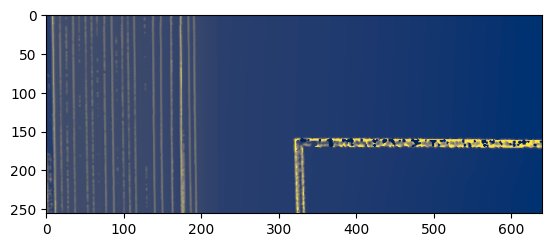

In [4]:
import matplotlib.pyplot as plt
print(d.max(), d.min())
plt.imshow(d, cmap="cividis_r")

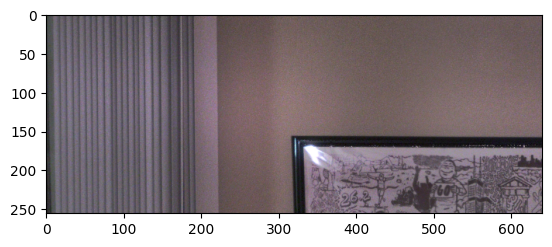

In [5]:
plt.imshow(img)

# DataLoader

In [1]:
import diode
import diode_loader as dloader
import os
import matplotlib.pyplot as plt
import numpy as np

os.environ["CUDA_VISIBLE_DEVICES"]="3"

2022-11-14 00:11:39.699231: I tensorflow/stream_executor/platform/default/dso_loader.cc:49] Successfully opened dynamic library libcudart.so.10.1
/data/awong189/miniconda/envs/thesis/lib/python3.9/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.4
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [2]:
train = dloader.generate_dataframe("./splits/diode_train.csv")
train_generator = diode.DataGenerator(train, batch_size=64)

In [ ]:
# for i in range(len(train_generator)):
#     print(f"{i}/{len(train_generator)}")
#     loader = train_generator.__getitem__(i)

loader = train_generator.__getitem__(5)

In [4]:
loader[0].shape

(64, 256, 640, 3)

In [5]:
loader[1][0].max()

1.0

0.0 1.0
0.0 1.0
0.0 1.0
0.0 1.0
0.0 1.0
0.0 1.0
0.0 1.0
0.0 1.0
0.0 1.0
1.0 1.0


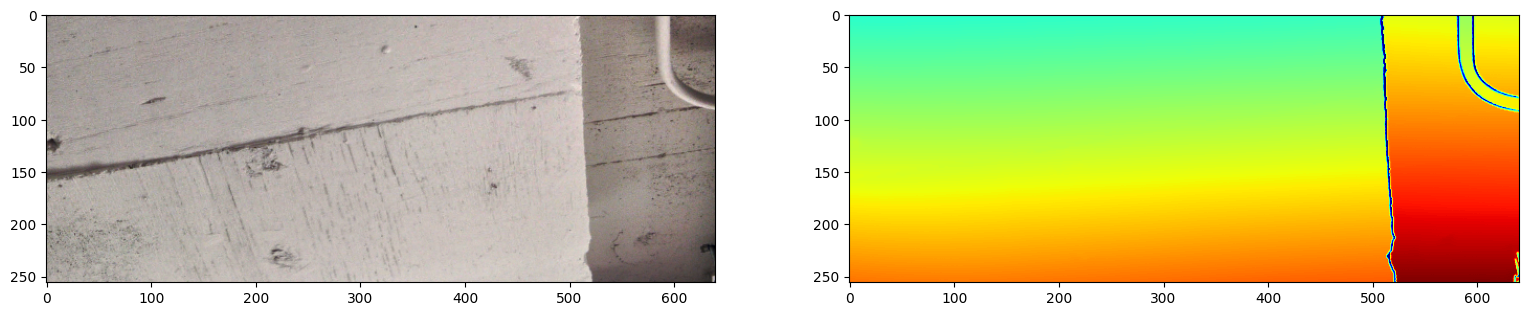

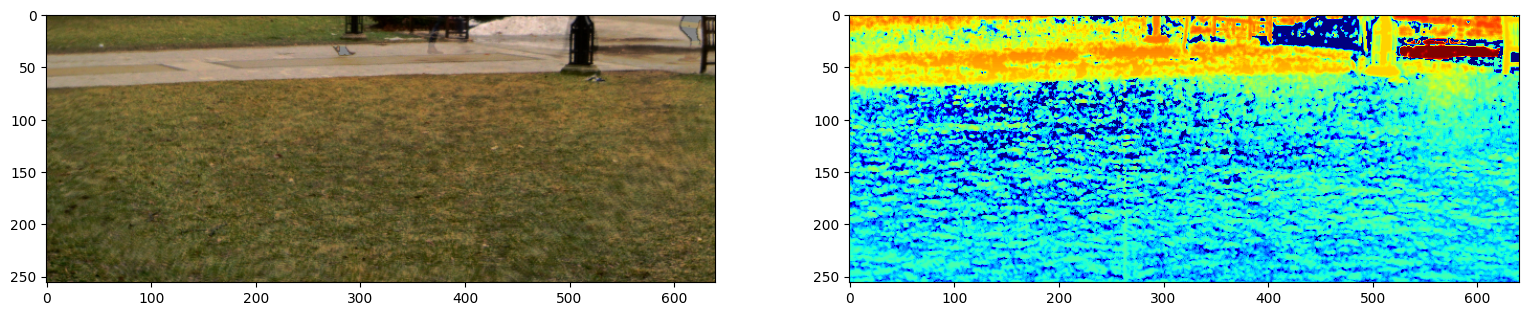

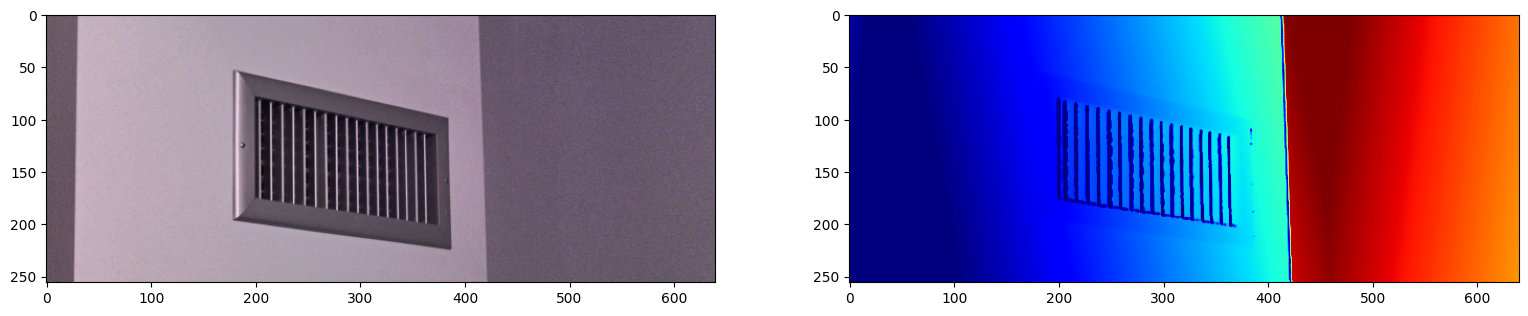

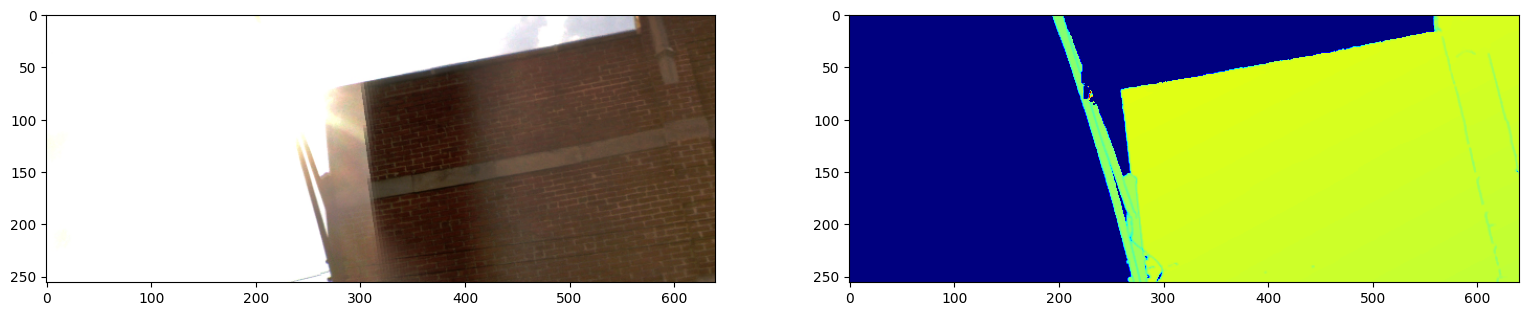

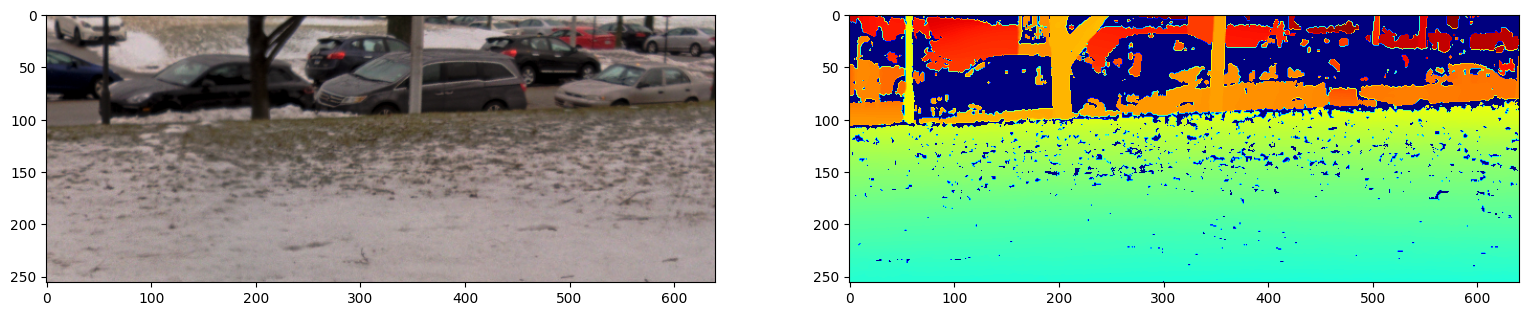

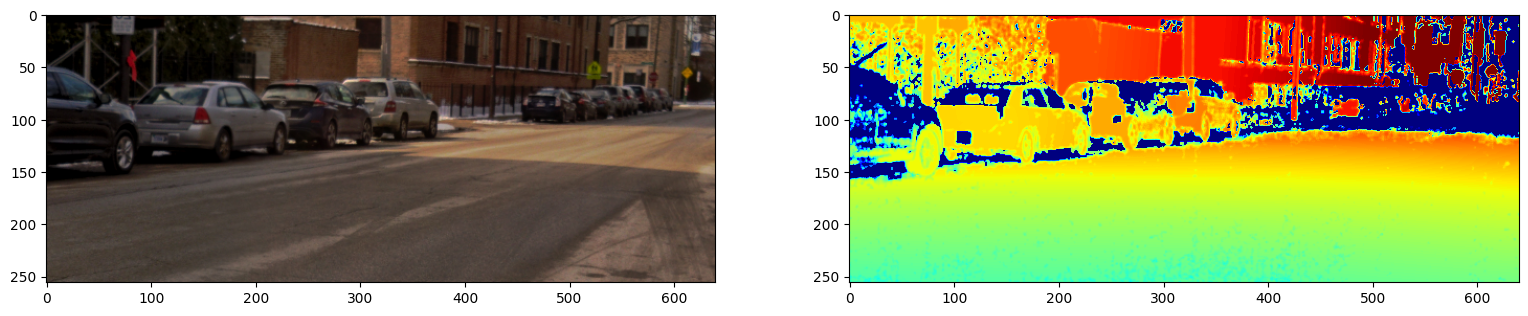

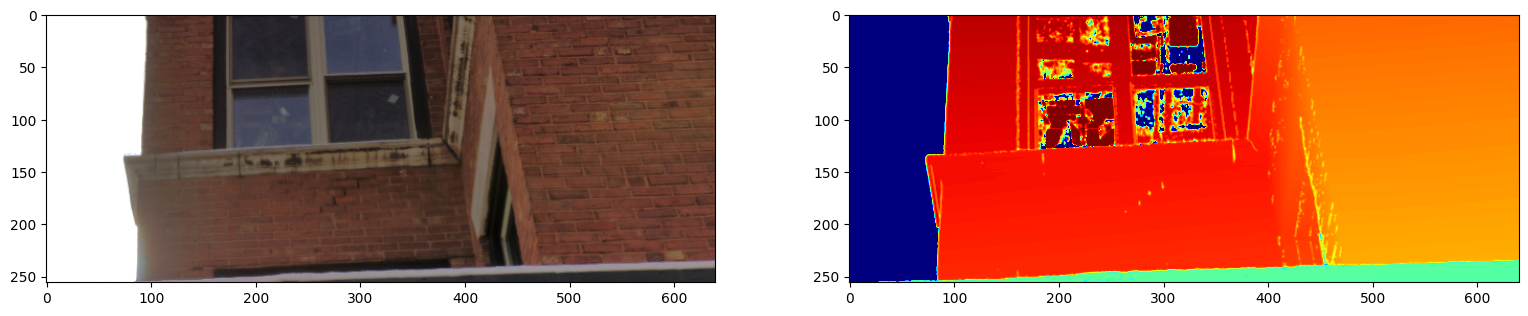

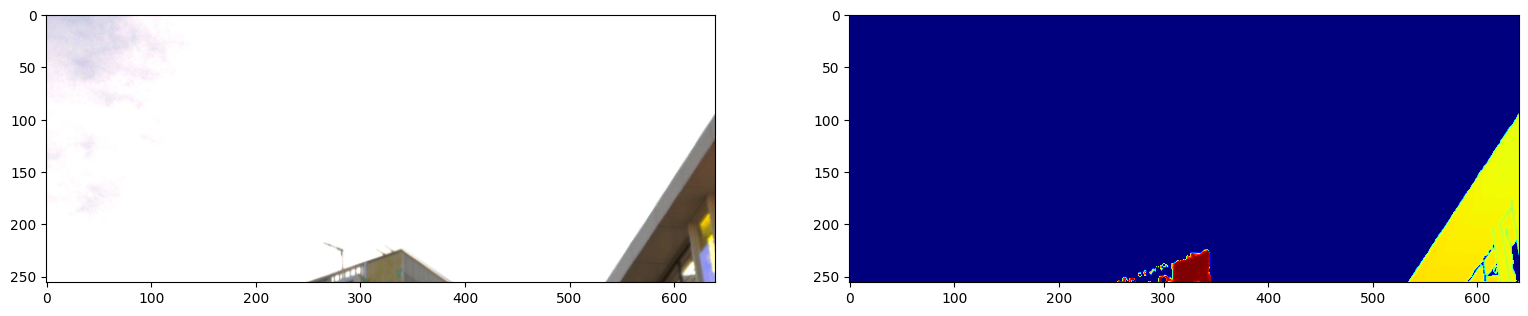

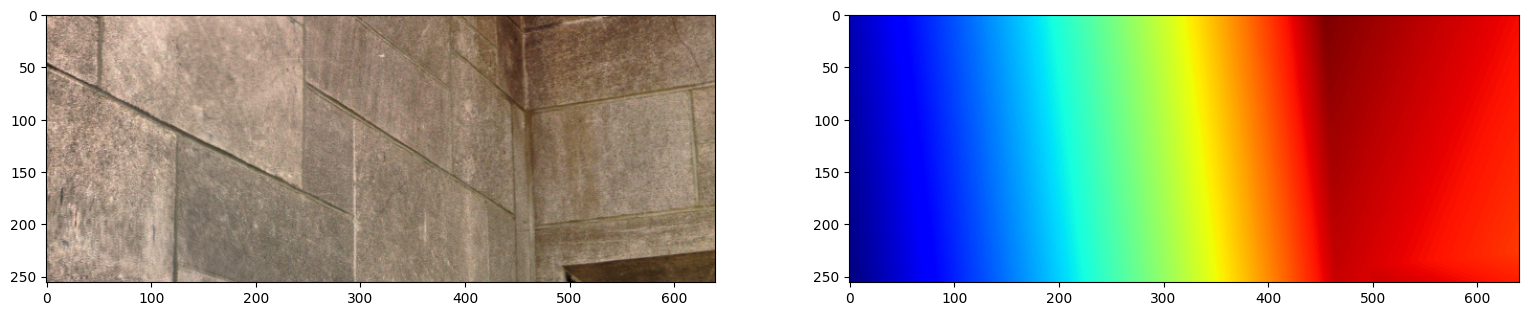

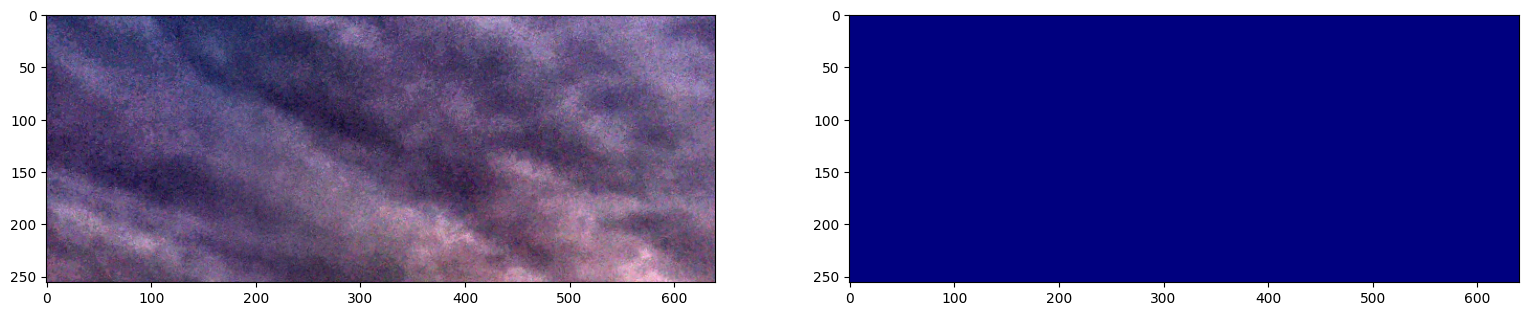

In [6]:
import matplotlib.pyplot as plt

for i in range(10):
    plt.figure(figsize=(19,10))
    plt.subplot(1,2,1)
    plt.imshow(loader[0][i+10])
    plt.subplot(1,2,2)
    
    cmap = plt.cm.jet
    cmap.set_bad(color='black')
    plt.imshow(loader[1][i+10], cmap=cmap)
    print(loader[1][i+10].min(), loader[1][i+10].max())

# Results

In [3]:
from models.TCSVT import *
from utils import loss_function, accuracy_function, new_loss_function, new_new_loss
import os

os.environ["CUDA_VISIBLE_DEVICES"]="3"
keras.backend.clear_session()

custom_func = {"new_new_loss": new_new_loss, "new_loss_function": new_loss_function, "loss_function": loss_function, "accuracy_function": accuracy_function, "DownSampling": DownSampling, "UpSampling": UpSampling, "Scene_Understanding": Scene_Understanding }

model = tf.keras.models.load_model('./mobile_diode_scene_skip_loss_1.h5', custom_objects=custom_func)

/data/awong189/miniconda/envs/thesis/lib/python3.9/site-packages/tensorflow_addons/utils/ensure_tf_install.py:53: UserWarning: Tensorflow Addons supports using Python ops for all Tensorflow versions above or equal to 2.7.0 and strictly below 2.10.0 (nightly versions are not supported). 
 The versions of TensorFlow you are currently using is 2.4.1 and is not supported. 
Some things might work, some things might not.
If you were to encounter a bug, do not file an issue.
If you want to make sure you're using a tested and supported configuration, either change the TensorFlow version or the TensorFlow Addons's version. 
You can find the compatibility matrix in TensorFlow Addon's readme:
https://github.com/tensorflow/addons
  warnings.warn(
2022-11-14 00:11:49.263659: I tensorflow/compiler/jit/xla_cpu_device.cc:41] Not creating XLA devices, tf_xla_enable_xla_devices not set
2022-11-14 00:11:49.264853: I tensorflow/stream_executor/platform/default/dso_loader.cc:49] Successfully opened dynamic

In [4]:
model.summary()

Model: "model"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 256, 640, 3) 0                                            
__________________________________________________________________________________________________
Conv1 (Conv2D)                  (None, 128, 320, 32) 864         input_1[0][0]                    
__________________________________________________________________________________________________
bn_Conv1 (BatchNormalization)   (None, 128, 320, 32) 128         Conv1[0][0]                      
__________________________________________________________________________________________________
Conv1_relu (ReLU)               (None, 128, 320, 32) 0           bn_Conv1[0][0]                   
______________________________________________________________________________________________

In [5]:
test = dloader.generate_dataframe("./splits/diode_val.csv")
test_generator = diode.DataGenerator(test, batch_size=30)

In [6]:
loader = test_generator.__getitem__(6)

In [7]:
i = 10
img = loader[0][i]
depth = loader[1][i]

In [8]:
import numpy as np
print(img.min(), img.max())
pred = model.predict(np.expand_dims(img, axis=0))

0.0 1.0


2022-11-14 00:12:05.483846: I tensorflow/compiler/mlir/mlir_graph_optimization_pass.cc:116] None of the MLIR optimization passes are enabled (registered 2)
2022-11-14 00:12:05.484564: I tensorflow/core/platform/profile_utils/cpu_utils.cc:112] CPU Frequency: 1995935000 Hz
2022-11-14 00:12:06.140909: I tensorflow/stream_executor/platform/default/dso_loader.cc:49] Successfully opened dynamic library libcublas.so.10
2022-11-14 00:12:06.341969: I tensorflow/stream_executor/platform/default/dso_loader.cc:49] Successfully opened dynamic library libcudnn.so.7
2022-11-14 00:12:07.463135: W tensorflow/stream_executor/gpu/asm_compiler.cc:63] Running ptxas --version returned 256
2022-11-14 00:12:07.614059: W tensorflow/stream_executor/gpu/redzone_allocator.cc:314] Internal: ptxas exited with non-zero error code 256, output: 
Relying on driver to perform ptx compilation. 
Modify $PATH to customize ptxas location.
This message will be only logged once.


0.011414033 0.05464856


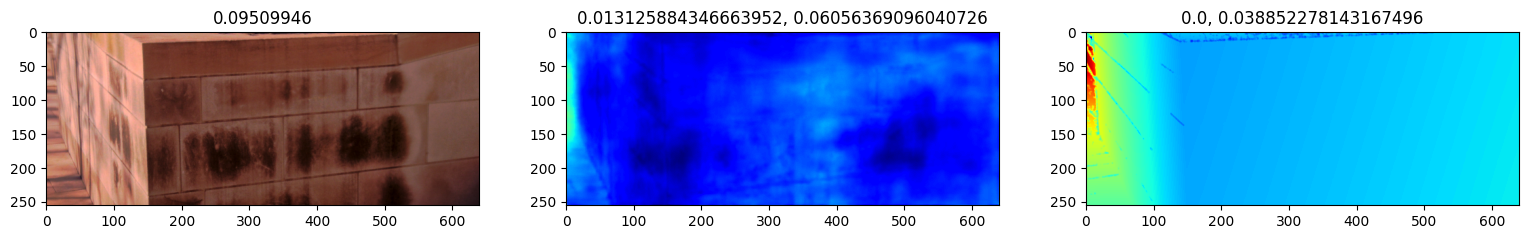

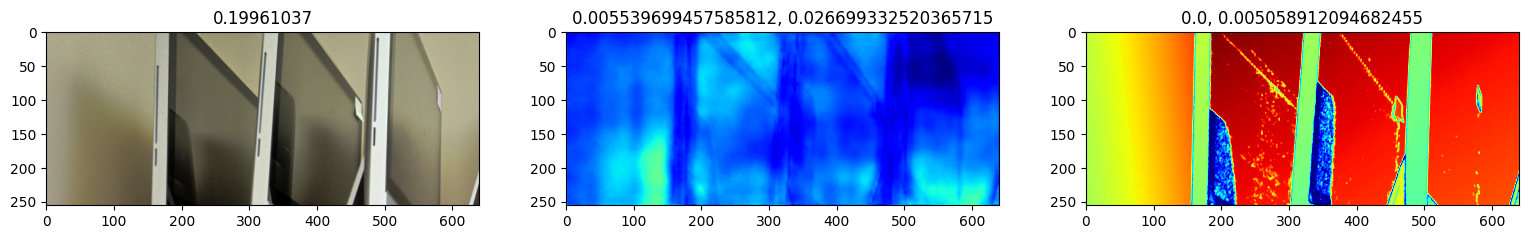

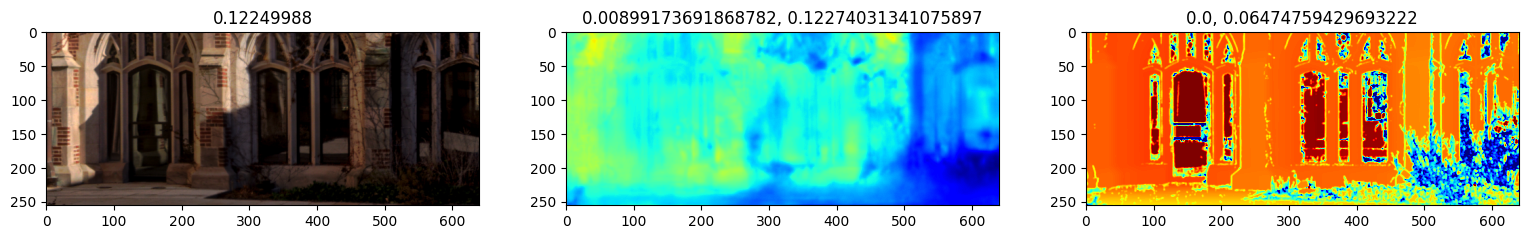

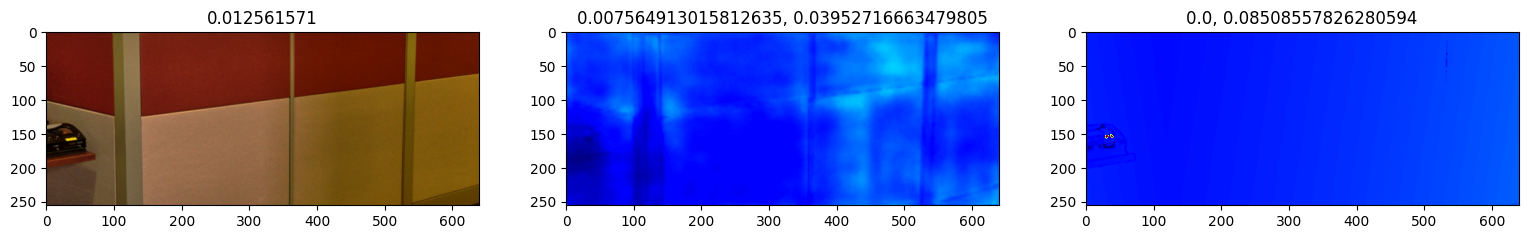

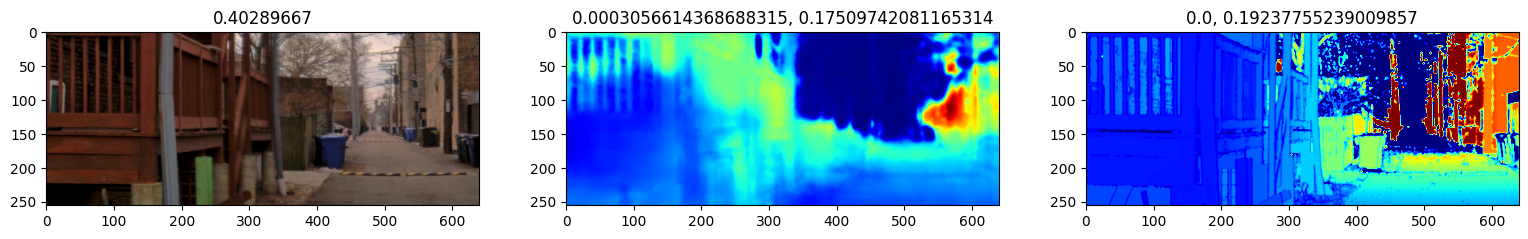

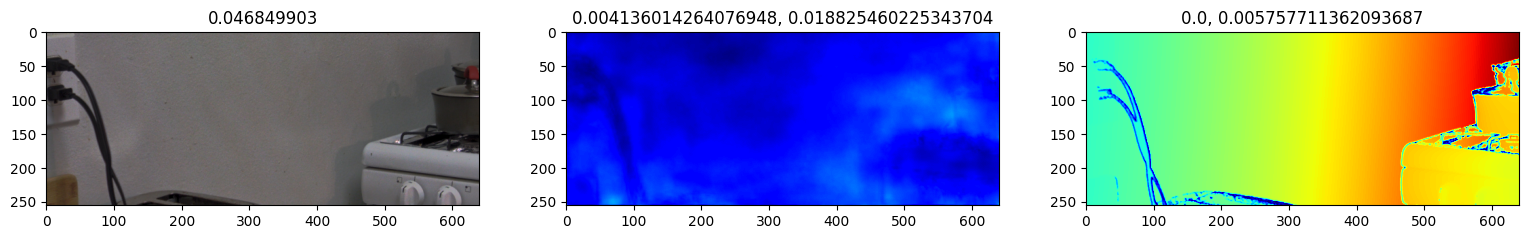

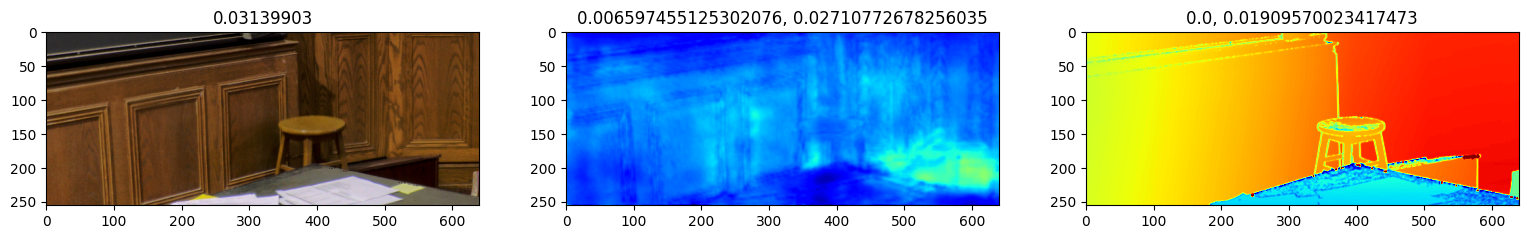

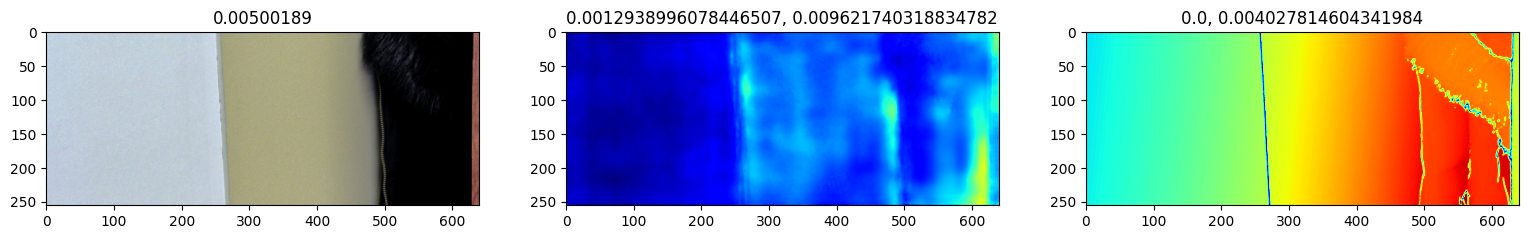

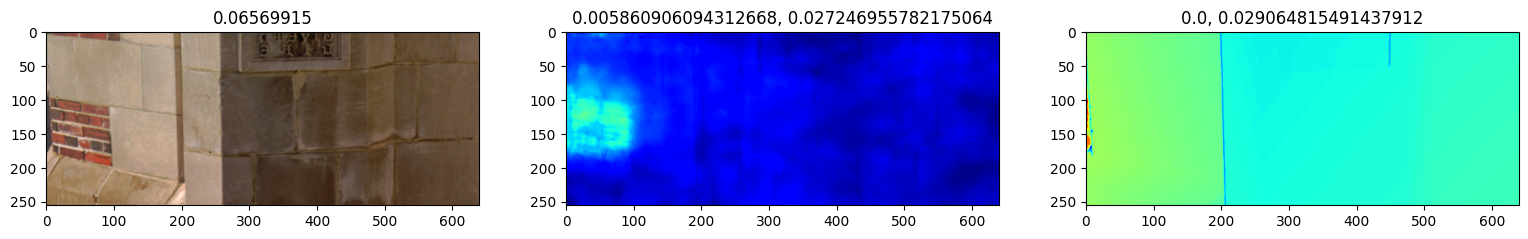

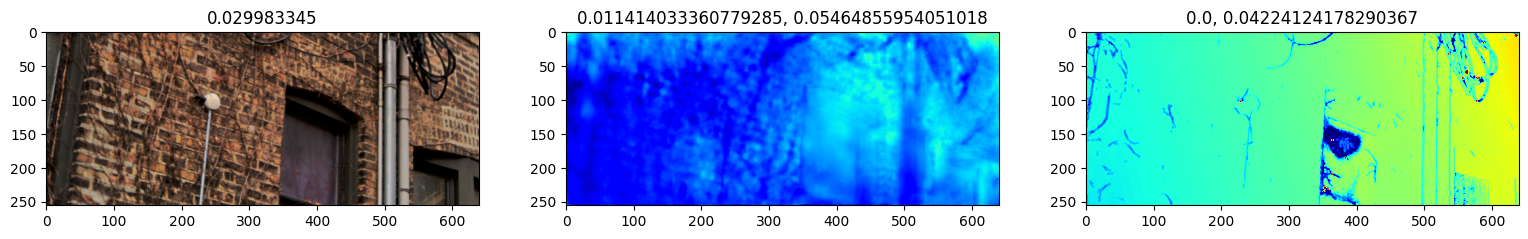

In [10]:
import matplotlib.pyplot as plt

print(pred.min(), pred.max())
cmap = plt.cm.jet
cmap.set_bad(color='black')

for i in range(10):
    i = i
    img = loader[0][i]
    depth = loader[1][i]
    pred = model.predict(np.expand_dims(img, axis=0))
    
    target = tf.convert_to_tensor(depth)
    target = tf.expand_dims(depth, 0)
    prediction = tf.convert_to_tensor(pred)
    loss = new_new_loss(target, prediction) #10, 10, 1000
    
    plt.figure(figsize=(19,10))
    plt.subplot(1,3,1)
    plt.title(loss.numpy())
    plt.imshow(np.squeeze(img))
    plt.subplot(1,3,2)
    plt.title(f"{pred.min()}, {pred.max()}")
    plt.imshow(np.squeeze(pred), cmap=cmap)
    plt.subplot(1,3,3)
    plt.title(f"{depth.min()}, {depth.max()}")
    plt.imshow(np.squeeze(depth), cmap=cmap)

# cmap = plt.cm.jet
# cmap.set_bad(color='black')
# plt.imshow(, cmap=cmap)

0.0 0.104502715


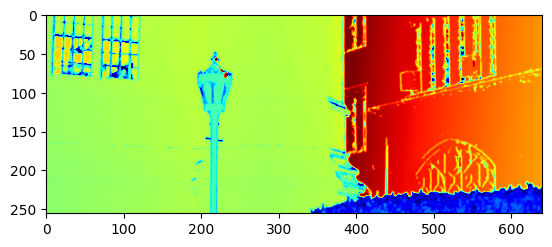

In [10]:
print(depth.min(), depth.max())

cmap = plt.cm.jet
cmap.set_bad(color='black')
plt.imshow(np.squeeze(depth), cmap=cmap)

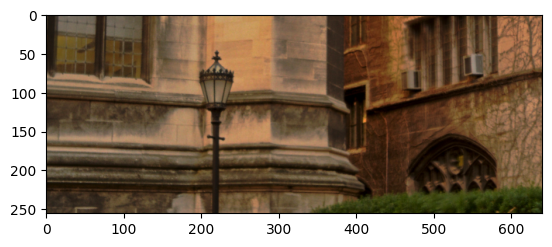

In [11]:
plt.imshow(img)

In [12]:
import tensorflow as tf
from utils import new_new_loss

target = tf.convert_to_tensor(depth)
target = tf.expand_dims(depth, 0)

prediction = tf.convert_to_tensor(pred)

new_new_loss(target, target - 0.001)

<tf.Tensor: shape=(), dtype=float32, numpy=0.94984734>

In [13]:
depth.min()

0.0

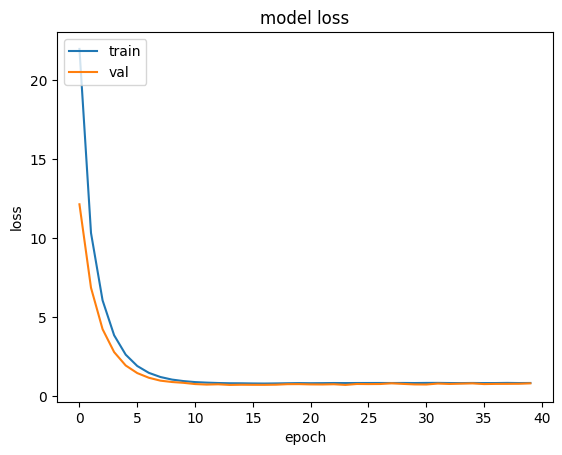

In [1]:
import pickle
import matplotlib.pyplot as plt


with open("wnet_diode_5.history", "rb") as file:
    history = pickle.load(file)

plt.plot(history['loss'])
plt.plot(history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

In [21]:
from utils import new_new_loss
import tensorflow as tf
import numpy as np

test = dloader.generate_dataframe("./splits/diode_val.csv")
test_generator = diode.DataGenerator(test, batch_size=30)
loader = test_generator.__getitem__(1)
pred = loader[0][0]
depth = loader[1][1]
d = tf.convert_to_tensor(depth)
d = tf.expand_dims(d, 0)
p = tf.convert_to_tensor(np.random.rand(1, 256, 640, 1), dtype="float32")

print(d.dtype)
print(p.dtype)

new_new_loss(d, p, debug=True)

<dtype: 'float32'>
<dtype: 'float32'>


2022-10-05 22:59:44.743342: I tensorflow/stream_executor/platform/default/dso_loader.cc:49] Successfully opened dynamic library libcudnn.so.7
2022-10-05 22:59:46.272866: W tensorflow/stream_executor/gpu/asm_compiler.cc:63] Running ptxas --version returned 256
2022-10-05 22:59:46.400382: W tensorflow/stream_executor/gpu/redzone_allocator.cc:314] Internal: ptxas exited with non-zero error code 256, output: 
Relying on driver to perform ptx compilation. 
Modify $PATH to customize ptxas location.
This message will be only logged once.
2022-10-05 22:59:47.305157: I tensorflow/stream_executor/platform/default/dso_loader.cc:49] Successfully opened dynamic library libcublas.so.10


ssim: 1.0972529649734497 | depth: 0.9472995400428772 | berhu: 0.10653207451105118 | sobel: 1.6282607316970825 | total loss: 3.7793455123901367


<tf.Tensor: shape=(), dtype=float32, numpy=3.7793455>